## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [17]:
#https://pynative.com/python-postgresql-tutorial/
#https://fb.watch/84Np7vVJAX/

In [1]:
import pandas as pd
import numpy as np

In [21]:
from psycopg2 import Error
#psycopg2.connect()
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="lhl_student",
                                  password="lhl_student",
                                  host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
                                  port="5432",
                                  database="mid_term_project")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

NameError: name 'psycopg2' is not defined

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/bd/lighthouse-data-notes/Week_5/Day_5/flights.txt')
pd.set_option('display.max_columns',100)
data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-06-04,UA,UA,UA,2094,UA,N815UA,2094,12266,IAH,"Houston, TX",12953,LGA,"New York, NY",1630,1742.0,72.0,12.0,1754.0,2149.0,37.0,2102,2226.0,84.0,0,NaN,0,N,212,224.0,175.0,1,1416,9.0,0.0,12.0,0.0,63.0,NaN,NaN,NaN,NaN
1,2019-10-14,DL,DL,DL,2953,DL,N811DZ,2953,12889,LAS,"Las Vegas, NV",14869,SLC,"Salt Lake City, UT",1407,1543.0,96.0,24.0,1607.0,1803.0,5.0,1630,1808.0,98.0,0,NaN,0,N,83,85.0,56.0,1,368,96.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-04-26,B6,B6,B6,952,B6,N563JB,952,13204,MCO,"Orlando, FL",10721,BOS,"Boston, MA",1303,1419.0,76.0,13.0,1432.0,1705.0,10.0,1601,1715.0,74.0,0,NaN,0,N,178,176.0,153.0,1,1121,0.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2018-07-23,UA,UA_CODESHARE,UA,3433,YX,N645RW,3433,11292,DEN,"Denver, CO",11109,COS,"Colorado Springs, CO",1400,1357.0,-3.0,10.0,1407.0,1426.0,6.0,1447,1432.0,-15.0,0,NaN,0,N,47,35.0,19.0,1,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-25,AA,AA_CODESHARE,AA,5206,OH,N508AE,5206,11617,EWN,"New Bern/Morehead/Beaufort, NC",11057,CLT,"Charlotte, NC",911,905.0,-6.0,13.0,918.0,1004.0,10.0,1044,1014.0,-30.0,0,NaN,0,N,93,69.0,46.0,1,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  33
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 159
dep_delay                166
taxi_out                 168
wheels_off               168
wheels_on                174
taxi_in                  174
crs_arr_time               0
arr_time                 172
arr_delay                190
cancelled                  0
cancellation_code       9834
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      189
air_time                 191
flights                    0
distance                   0
carrier_delay           8091
weather_delay 

In [4]:
delay=data[['dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
delay.describe()

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,9834.000000,9810.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000
mean,9.979764,4.945668,19.828182,3.411210,15.829230,0.177580,25.353064
std,43.679128,45.881558,55.774994,33.875065,32.436734,3.042053,46.941018
min,-30.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,-6.000000,0.000000,0.000000,2.000000,0.000000,4.000000
75%,7.000000,7.000000,18.000000,0.000000,19.000000,0.000000,32.000000
max,1126.000000,1116.000000,1116.000000,1033.000000,399.000000,75.000000,494.000000


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [65]:
# Shapiro-Wilk Test and normal
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest


delay1=delay[delay['arr_delay']>0]

# normality test

for i in delay1:
    _,n = normaltest(delay1[i])
    _,s = shapiro(delay1[i])
    #p.append([stat,p])
    print(i)
    print('Normal(p)=%.3f, shapire(p)=%.3f' % (n, s))
delay1['arr_delay'].mean()

dep_delay
Normal(p)=0.000, shapire(p)=0.000
arr_delay
Normal(p)=0.000, shapire(p)=0.000
carrier_delay
Normal(p)=nan, shapire(p)=1.000
weather_delay
Normal(p)=nan, shapire(p)=1.000
nas_delay
Normal(p)=nan, shapire(p)=1.000
security_delay
Normal(p)=nan, shapire(p)=1.000
late_aircraft_delay
Normal(p)=nan, shapire(p)=1.000
percentage
Normal(p)=0.000, shapire(p)=0.000


39.1960958296362

In [72]:
delay_normal=(delay1['arr_delay'] - delay1['arr_delay'].min())/(delay1['arr_delay'].max() - delay1['arr_delay'].min())

In [73]:
# normality test after normalization

#for i in delay_normal:
_,n = normaltest(delay_normal)
_,s = shapiro(delay_normal)
    #p.append([stat,p])

print('Normal(p)=%.3f, shapire(p)=%.3f' % (n, s))

Normal(p)=0.000, shapire(p)=0.000


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [9]:
from datetime import datetime
year=data[['fl_date','dep_delay','arr_delay']]#,'carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]
year['fl_date'] = pd.to_datetime(year['fl_date'],format='%Y-%m-%d')
year['year'] = pd.DatetimeIndex(year['fl_date']).year
year['month'] = pd.DatetimeIndex(year['fl_date']).month

<ipython-input-9-661cc94ba4e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['fl_date'] = pd.to_datetime(year['fl_date'],format='%Y-%m-%d')
<ipython-input-9-661cc94ba4e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year['year'] = pd.DatetimeIndex(year['fl_date']).year
<ipython-input-9-661cc94ba4e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [10]:
year.groupby('month').mean()


,dep_delay,arr_delay,year
month,,,
1,11.785714,6.241071,2018.508176
2,10.674009,4.760294,2018.526093
3,6.585221,1.661905,2018.515258
4,8.673784,3.667461,2018.525029
5,8.535844,3.713065,2018.509592
6,12.863529,8.751472,2018.483796
7,15.084983,10.300937,2018.530079
8,13.110860,8.971559,2018.532669
9,6.022727,0.552465,2018.516129


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [71]:
import math
day=data[['dep_time','taxi_out']]
day['minutes']=day['dep_time']%100
day['dep_time']=day['dep_time'].fillna(0)

trunc = lambda x: math.trunc(x / 100);
day['hours']=day['dep_time'].apply(trunc)
#print(day['hours'][0])


<ipython-input-71-114d22c44960>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['minutes']=day['dep_time']%100
<ipython-input-71-114d22c44960>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['dep_time']=day['dep_time'].fillna(0)
<ipython-input-71-114d22c44960>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [49]:
import matplotlib.pyplot as plt
graph=day.groupby('hours').mean().sort_values(by='taxi_out', ascending=False).reset_index()
graph.head()


,hours,dep_time,taxi_out,minutes
0,8,829.977310,19.103728,29.977310
1,18,1829.232305,18.548094,29.232305
2,7,728.905097,18.410211,28.905097
3,17,1730.108659,18.346939,30.108659
4,10,1030.332168,17.979021,30.332168


<function matplotlib.pyplot.show(close=None, block=None)>

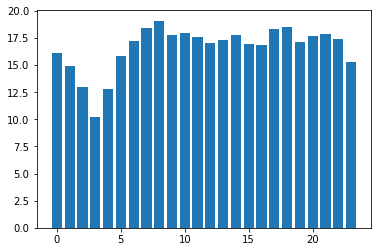

In [50]:
plt.bar(graph['hours'],graph['taxi_out'])
plt.show

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [62]:
import math
import statistics
delay['dep_delay']=delay['dep_delay'].fillna(0)
delay['arr_delay']=delay['arr_delay'].fillna(0)
delay['percentage']=delay['dep_delay']/delay['arr_delay']*100

delay['percentage'].describe()

<ipython-input-62-ee69de45adf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay['dep_delay']=delay['dep_delay'].fillna(0)
<ipython-input-62-ee69de45adf0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay['arr_delay']=delay['arr_delay'].fillna(0)
<ipython-input-62-ee69de45adf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

count    9828.000000
mean             NaN
std              NaN
min             -inf
25%         6.250000
50%        37.500000
75%        94.285714
max              inf
Name: percentage, dtype: float64

#### **Task 6**: How many states cover 50% of US air traffic? 

In [64]:
trafic=data[['origin_city_name','dest_city_name']]

In [71]:
origin=trafic.groupby('origin_city_name').count().sort_values(by='dest_city_name', ascending=False)
origin['percentage']=origin/100
count=0
perc=0
for i in origin['percentage']:
    if perc<50:
        perc+=i
        count+=1
print(count)

17


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [80]:
from scipy.stats import ttest_ind
data['air_time']=data['air_time'].fillna(data['air_time'].mean())
data['dep_delay']=data['dep_delay'].fillna(0)

In [81]:
ttest,pval = ttest_ind(data['air_time'], data['dep_delay'])
print("p-value",pval)

p-value 0.0


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [100]:
origin=data[['flights','origin_city_name','origin_airport_id']]
origin2=origin.groupby('origin_airport_id').sum().reset_index()
origin2
#origin['num_']origin2.sort_values(by='flights', ascending=False)

,origin_airport_id,flights
0,10135,3
1,10136,2
2,10140,44
3,10141,1
4,10146,4
...,...,...
314,15454,1
315,15624,8
316,15919,16
317,16101,1


In [101]:
dest=data[['flights','dest_city_name','dest_airport_id']]
dest2=dest.groupby('dest_airport_id').sum().reset_index()
dest2

,dest_airport_id,flights
0,10135,6
1,10136,1
2,10140,30
3,10141,1
4,10146,1
...,...,...
315,15624,13
316,15919,20
317,15991,1
318,16101,4


In [103]:
origin['dest_flights']=dest2['flights']
origin['total_flights']=origin['flights']+origin['dest_flights']
origin.head()

<ipython-input-103-4128ffaf4b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin['dest_flights']=dest2['flights']
<ipython-input-103-4128ffaf4b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  origin['total_flights']=origin['flights']+origin['dest_flights']


,flights,origin_city_name,origin_airport_id,dest_flights,total_flights
0,1,"Houston, TX",12266,6.0,7.0
1,1,"Las Vegas, NV",12889,1.0,2.0
2,1,"Orlando, FL",13204,30.0,31.0
3,1,"Denver, CO",11292,1.0,2.0
4,1,"New Bern/Morehead/Beaufort, NC",11617,1.0,2.0


In [105]:
origin.sort_values(by='total_flights', ascending=False).head(10)

,flights,origin_city_name,origin_airport_id,dest_flights,total_flights
20,1,"Dallas, TX",11259,510.0,511.0
222,1,"Dallas/Fort Worth, TX",11298,462.0,463.0
85,1,"Lihue, HI",12982,368.0,369.0
84,1,"Phoenix, AZ",10466,349.0,350.0
65,1,"Cincinnati, OH",11193,310.0,311.0
170,1,"Kahului, HI",13830,291.0,292.0
148,1,"Chicago, IL",13232,241.0,242.0
104,1,"Milwaukee, WI",13342,224.0,225.0
277,1,"Detroit, MI",11433,222.0,223.0
279,1,"Orlando, FL",13204,221.0,222.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?